# Ex09 - Técnicas de segmentação

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np


### Parte 1 - Segmentando múltiplos objetos por limiarização

A limiarização também pode ser feita em imagens com mais de um objeto e usando limiares múltiplos. Tente segmentar separadamente a cartela de comprimidos em uma imagem e os comprimidos em outra. Utilize o hstograma da imagem para escolher os limiares.

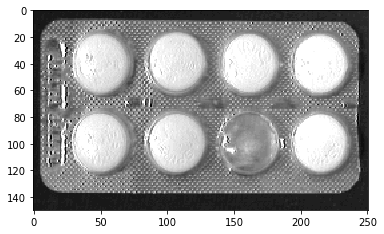

In [77]:
im2 = mpimg.imread('../data/astablet.tif')
plt.imshow(im2, cmap='gray')

### Parte 2 - Demonstração da limiarização por Otsu

Tente melhorar a demonstração da limiarização por Otsu ([Demo](../master/otsudemo.ipynb)).

In [78]:
def otsu(f):
     n = np.product(np.shape(f))
     h = 1.*np.bincount(f.ravel()) / n  
     if len(h) == 1: return 1,1
     x = np.arange(np.product(np.shape(h)))
     w0 = np.cumsum(h)
     w1 = 1 - w0
     eps = 1e-10
     m0 = np.cumsum(x * h) / (w0 + eps)
     mt = m0[-1]
     m1 = (mt - m0[0:-1]*w0[0:-1]) / w1[0:-1]
     sB2 = w0[0:-1] * w1[0:-1] * ((m0[0:-1] - m1)**2)
     t = np.argmax(sB2)
     v = sB2[t]
     st2 = sum((x-mt)**2 * h)
     eta = v / st2
     return t, eta

### Parte 3 - Segmentação por watershed

Tentem reproduzir a demonstração de segmentação por watershed da antiga toolbox ([pdf](../data/ia870_iadbeef.pdf)). Vocês podem usar as funções de watershed implementadas na biblioteca *scipy.ndimage.measurements* ou *skimage.morphology*. Você pode também se inspirar no Seminário do Eduardo ([link](./Seminarios/Watershed.ipynb)).
Quem quiser conhecer todos os algoritmos da Transformada de Watershed, eles estão descritos na Toolbox de Watershed desenvolvida por um de nossos alunos ([Toolbox Watershed](http://adessowiki.fee.unicamp.br/adesso/wiki/watershed/view/))